In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from utils.etc_functions import (
    load_image_and_metadata,
    compute_move_to_center,
    detect_marker_candidates,
    compute_candidate_center,
    preprocess_candidate,
    compute_score,
    compute_descriptors
)

In [2]:
# IDENT_PATH = os.path.join("images", "av_2_2")

# image, metadata = load_image_and_metadata(IDENT_PATH)
# metadata

image = cv2.imread(r"C:\Users\janlu\Desktop\StanfordProjects\BingChengEBPG\ARCHIVE\weakmarker_script\weakmarker_script\marker1_10um.png",0)

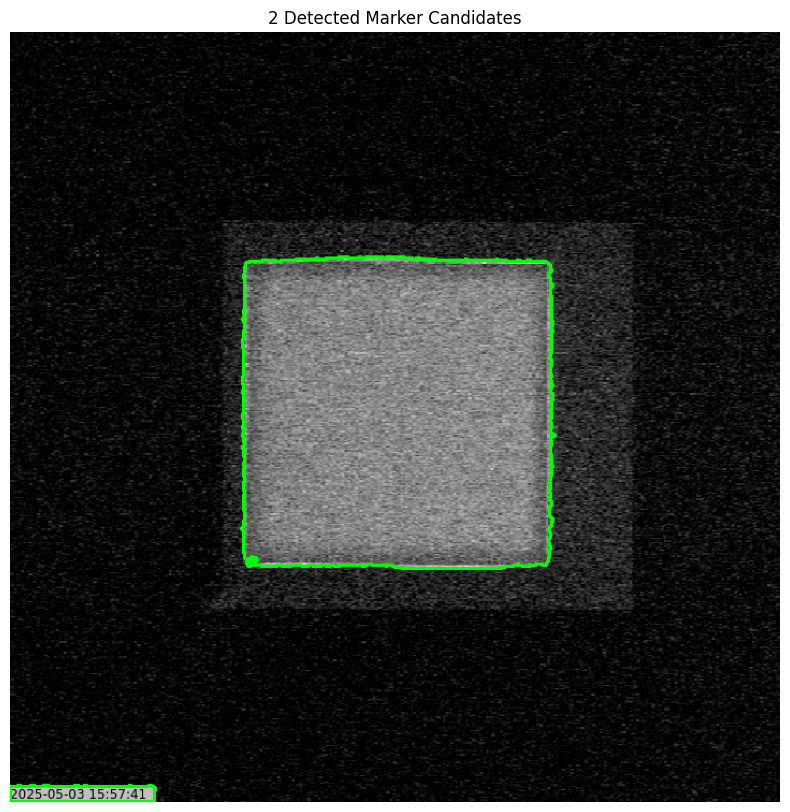

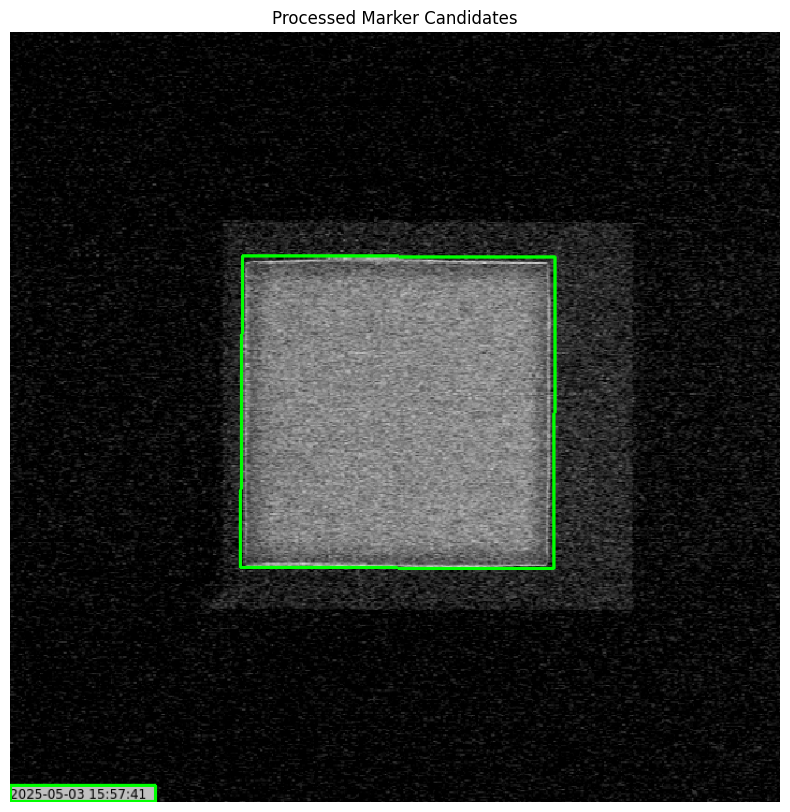

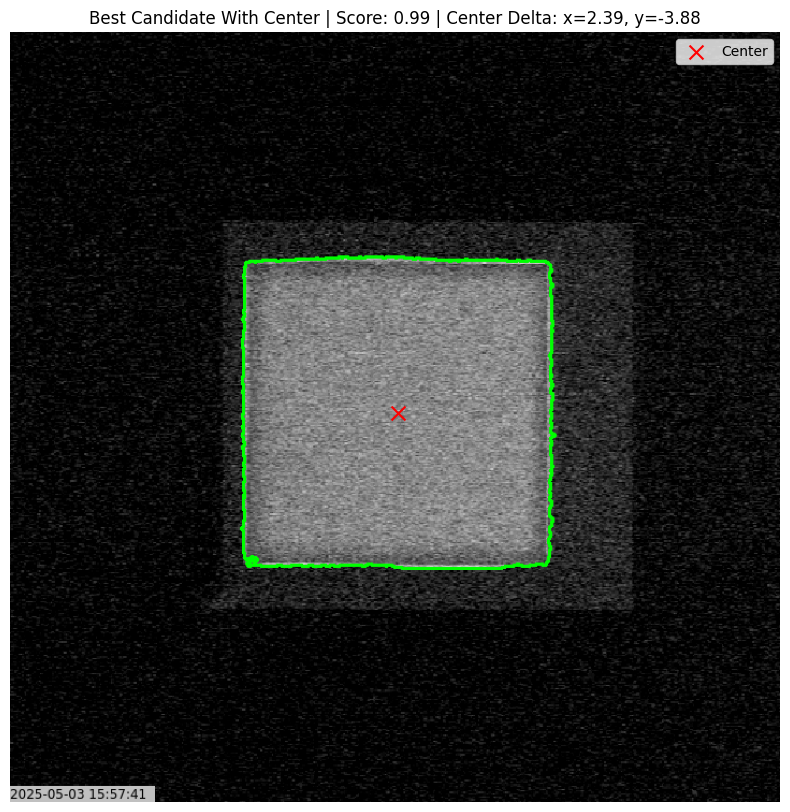

In [12]:
marker_candidates = detect_marker_candidates(image)
image_with_candidates = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_candidates, marker_candidates, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(image_with_candidates, cmap="gray")
plt.axis("off")
plt.title(f"{len(marker_candidates)} Detected Marker Candidates")
plt.show()

processed_marker_candidates = [preprocess_candidate(c) for c in marker_candidates]
image_with_candidates = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_candidates, processed_marker_candidates, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(image_with_candidates, cmap="gray")
plt.axis("off")
plt.title("Processed Marker Candidates")
plt.show()

candidate_descriptors = [compute_descriptors(c) for c in processed_marker_candidates]
candidate_scores = [compute_score(d) for d in candidate_descriptors]

best_candidate_index = np.argmax(candidate_scores)
best_candidate = marker_candidates[best_candidate_index]
best_score = candidate_scores[best_candidate_index]

marker_center = compute_candidate_center(best_candidate)

center_delta = [marker_center[0] - image.shape[1] // 2, marker_center[1] - image.shape[0] // 2]
image_with_candidates = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_candidates, [best_candidate], -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(image_with_candidates, cmap="gray")
plt.scatter(*marker_center, color="red", s=100, label="Center", marker="x")
plt.legend()
plt.axis("off")
plt.title(f"Best Candidate With Center | Score: {best_score:.2f} | Center Delta: x={center_delta[0]:.2f}, y={center_delta[1]:.2f}")
plt.show()

In [ ]:
relative_move_um = compute_move_to_center(marker_center, metadata)

(360.39124628959127, 354.12080234530447)


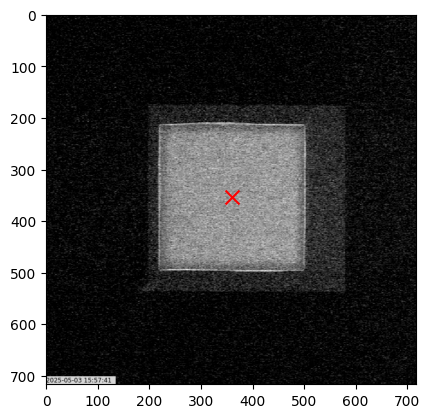

In [13]:
plt.imshow(image, cmap="gray")
plt.scatter(marker_center[0], marker_center[1], c="red", s=100, label="Best Candidate Center", marker="x")
print(marker_center)